# 신한카드 외국인 데이터 EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.float_format', '{:,.0f}'.format)  # scientific notation 없애고 천단위에 콤마 찍고, 소수점 없애기

In [3]:
# 한글 깨짐 방지용

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

# 데이터 불러오기

In [4]:
DATA = pd.read_csv('/content/drive/MyDrive/문화관광 데이터분석/카드데이터/FOREIGNER(2018.1_2022.4).txt', sep="|")

**card-foreign-preprocessing.ipynb 참고**

In [5]:
orders = ['서울','부산','대구','인천','광주','대전','울산','세종','경기','강원','충북','충남','전북','전남','경북','경남','제주']
DATA['v2'] = pd.Categorical(DATA['v2'], orders)  # 카드이용 가맹점 주소 변수 순서 직접 정해주기

In [6]:
DATA['ta_ym'] = pd.to_datetime(DATA['ta_ym'], format='%Y%m')  # 년월 변수 datetime 변수로 바꾸기; 근데 뒤에 1일이 그냥 붙어지는듯

In [7]:
DATA

,nt,v2,v3,gb3,gb2,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec
0,일본,서울,용산구,쇼핑,기타지출,2018-05-01,WHITE,기타,11586560,261
1,영국,서울,용산구,쇼핑,기타지출,2018-07-01,WHITE,기타,3483630,120
2,미국,서울,용산구,쇼핑,기타지출,2018-02-01,RED,기타,20831646,449
3,일본,경기,오산시,쇼핑,기타지출,2018-07-01,WHITE,기타,7000,3
4,미국,경기,오산시,쇼핑,기타지출,2018-01-01,WHITE,기타,700600,79
...,...,...,...,...,...,...,...,...,...,...
2781389,오스트레일리아,부산,해운대구,숙박,그외숙박,2022-03-01,WHITE,기타,1901634,5
2781390,중국,부산,해운대구,숙박,그외숙박,2022-03-01,RED,기타,122080,2
2781391,캐나다,부산,해운대구,쇼핑,기타쇼핑,2022-04-01,RED,기타,5000,1
2781392,캐나다,부산,해운대구,쇼핑,가전전자제품,2022-04-01,WHITE,기타,3400000,1


# 범주형 변수 시각화

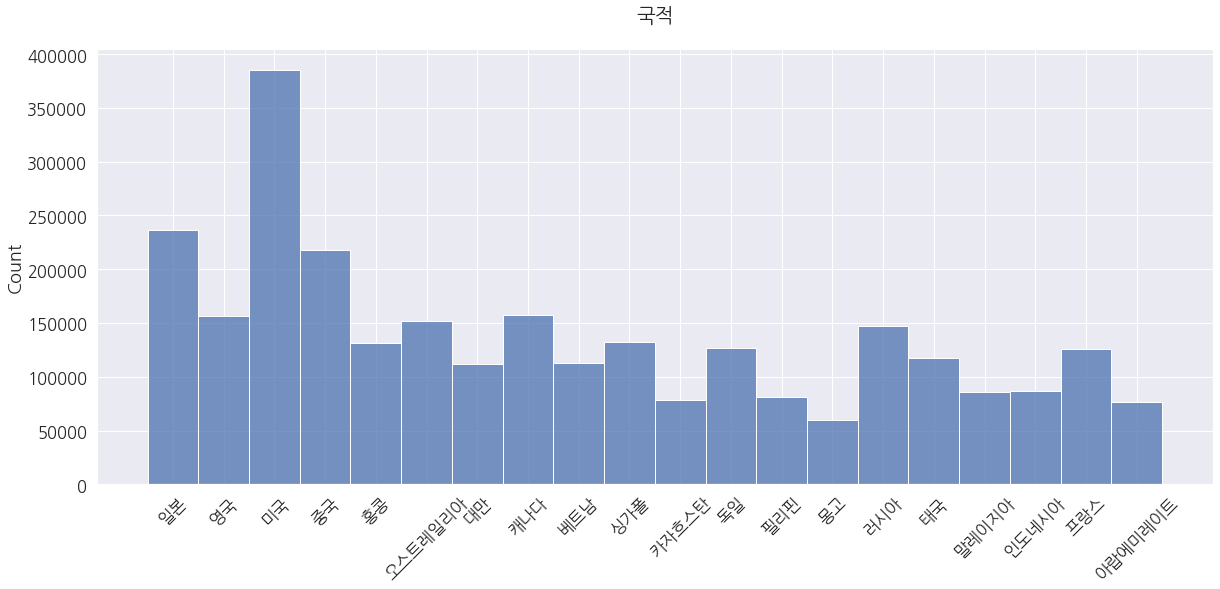

In [8]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
plt.xticks(rotation=45)
ax = sns.histplot(data=DATA, x="nt")
ax.set_title('국적\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

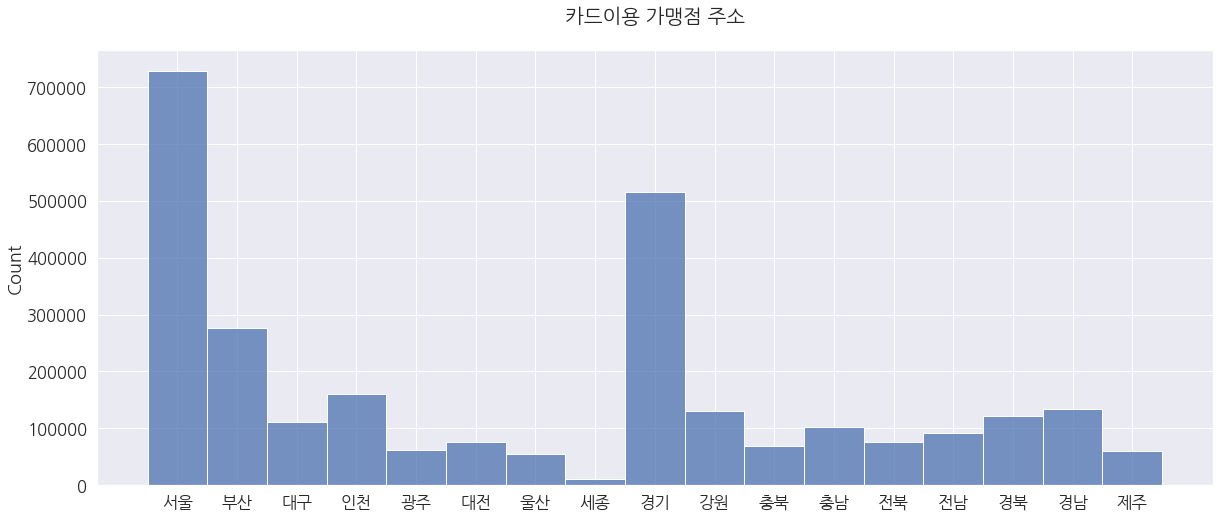

In [9]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
ax = sns.histplot(data=DATA, x="v2")
ax.set_title('카드이용 가맹점 주소\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

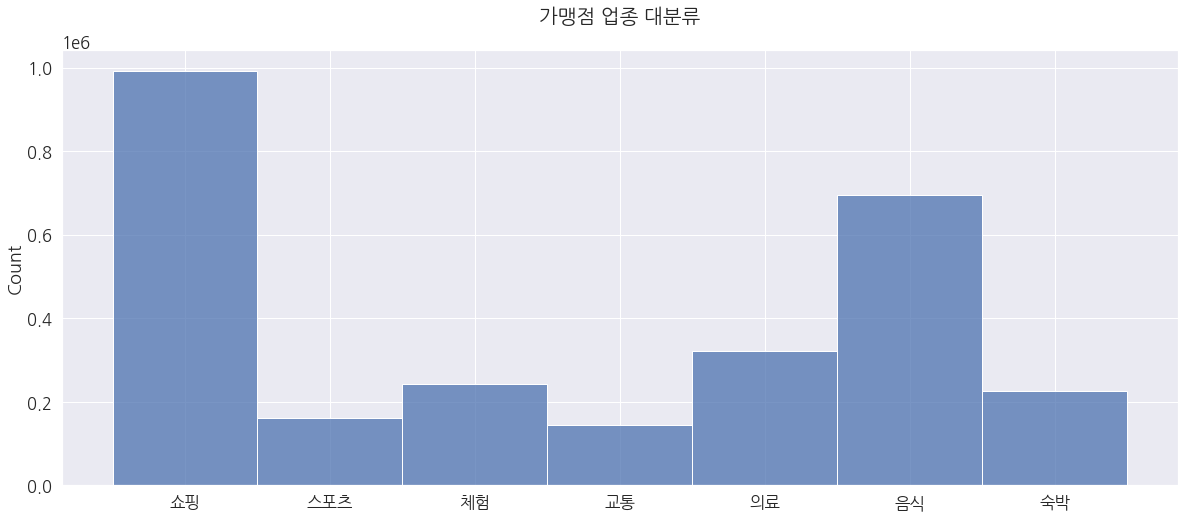

In [10]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
ax = sns.histplot(data=DATA, x="gb3")
ax.set_title('가맹점 업종 대분류\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

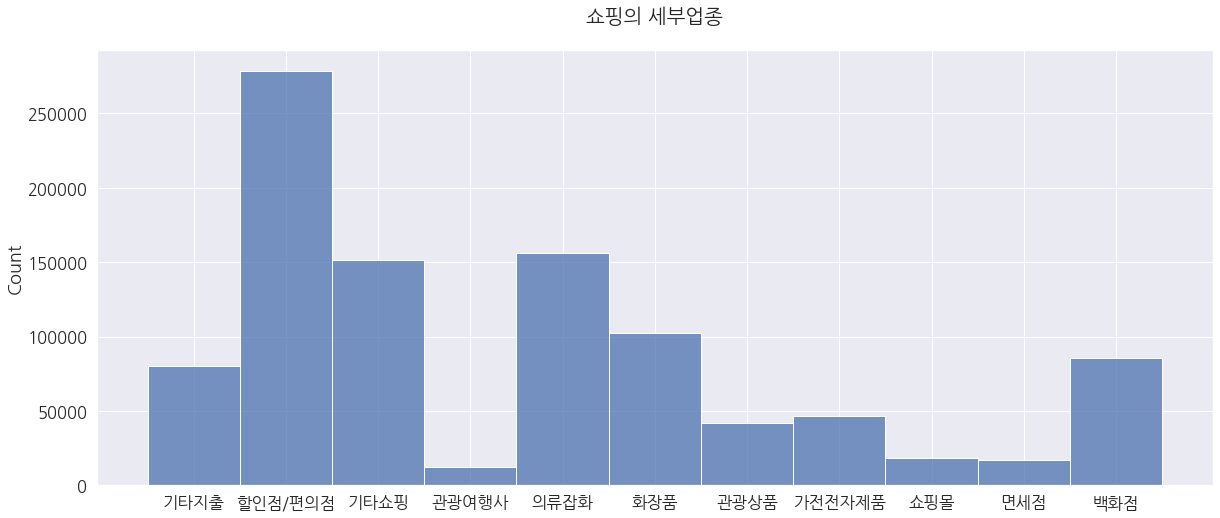

In [11]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
ax = sns.histplot(data=DATA[DATA['gb3']=='쇼핑'], x="gb2")
ax.set_title('쇼핑의 세부업종\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

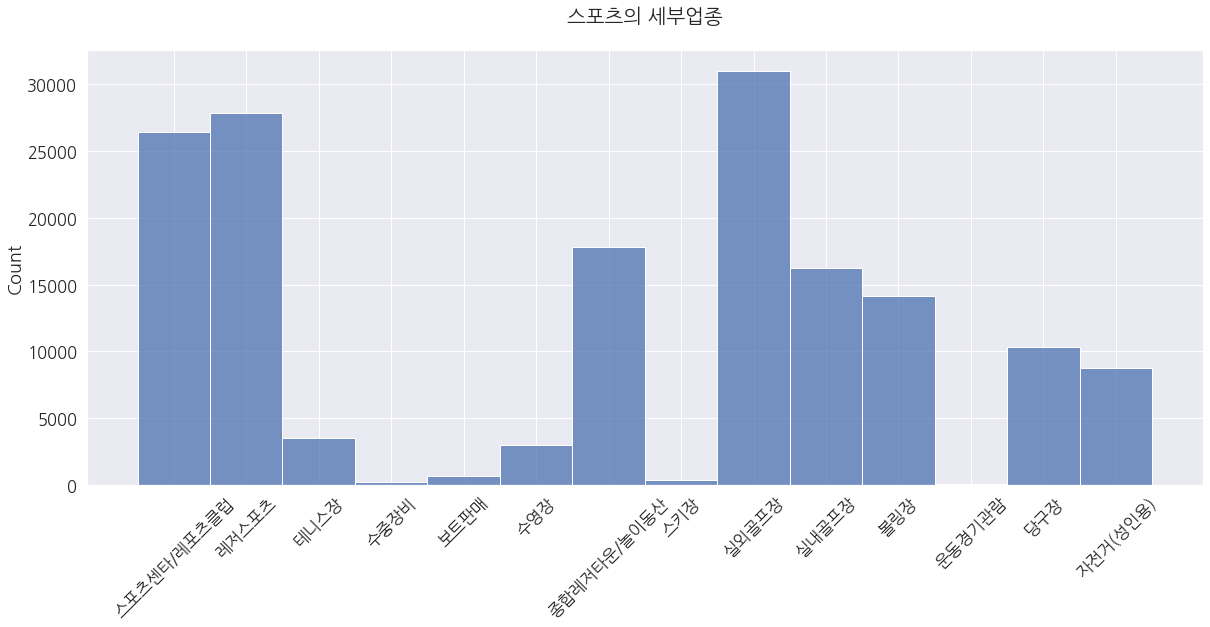

In [12]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
plt.xticks(rotation=45)
ax = sns.histplot(data=DATA[DATA['gb3']=='스포츠'], x="gb2")
ax.set_title('스포츠의 세부업종\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

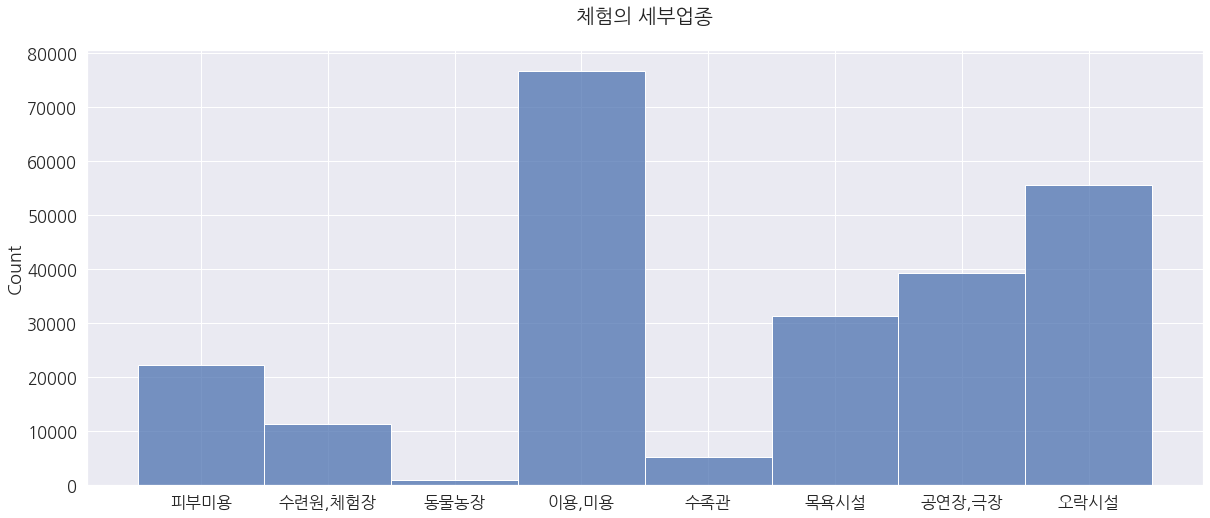

In [13]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
ax = sns.histplot(data=DATA[DATA['gb3']=='체험'], x="gb2")
ax.set_title('체험의 세부업종\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

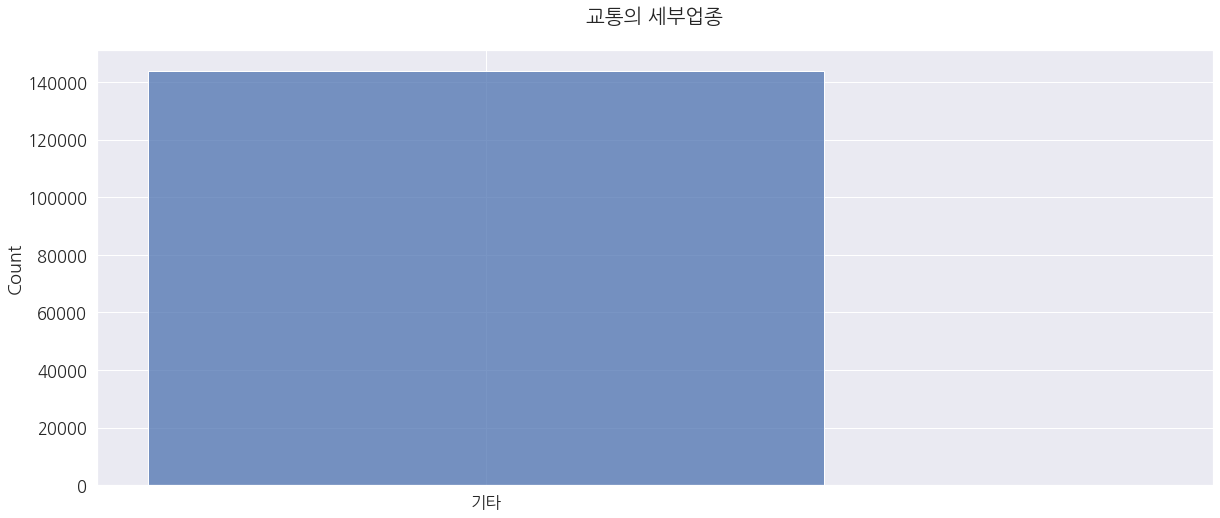

In [14]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
ax = sns.histplot(data=DATA[DATA['gb3']=='교통'], x="gb2")
ax.set_title('교통의 세부업종\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

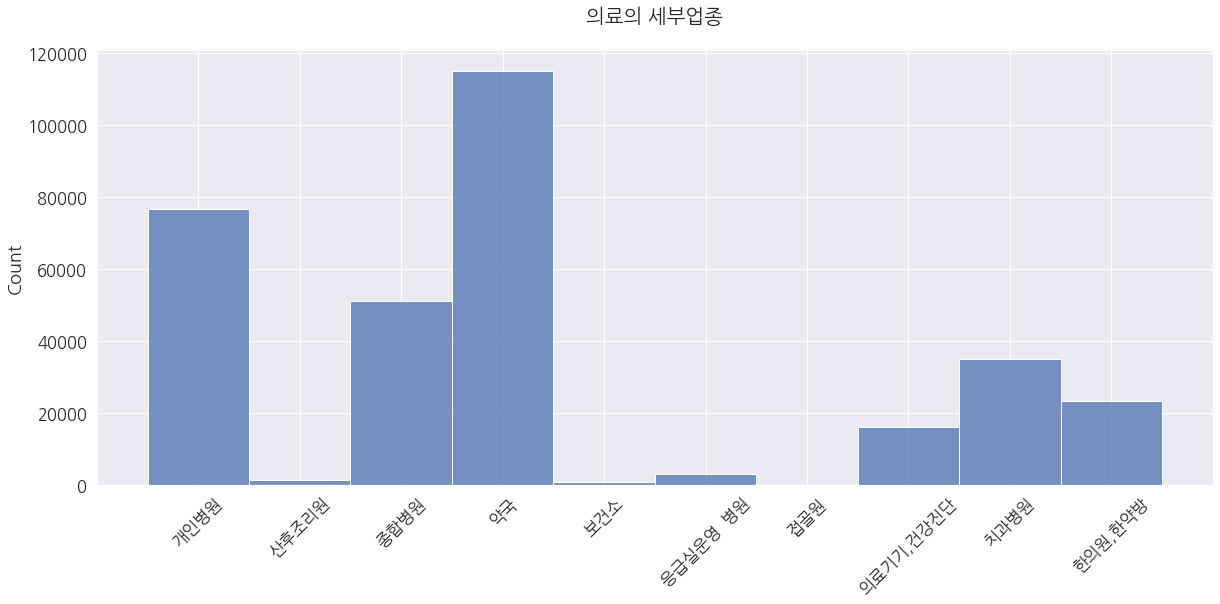

In [15]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
plt.xticks(rotation=45)
ax = sns.histplot(data=DATA[DATA['gb3']=='의료'], x="gb2")
ax.set_title('의료의 세부업종\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

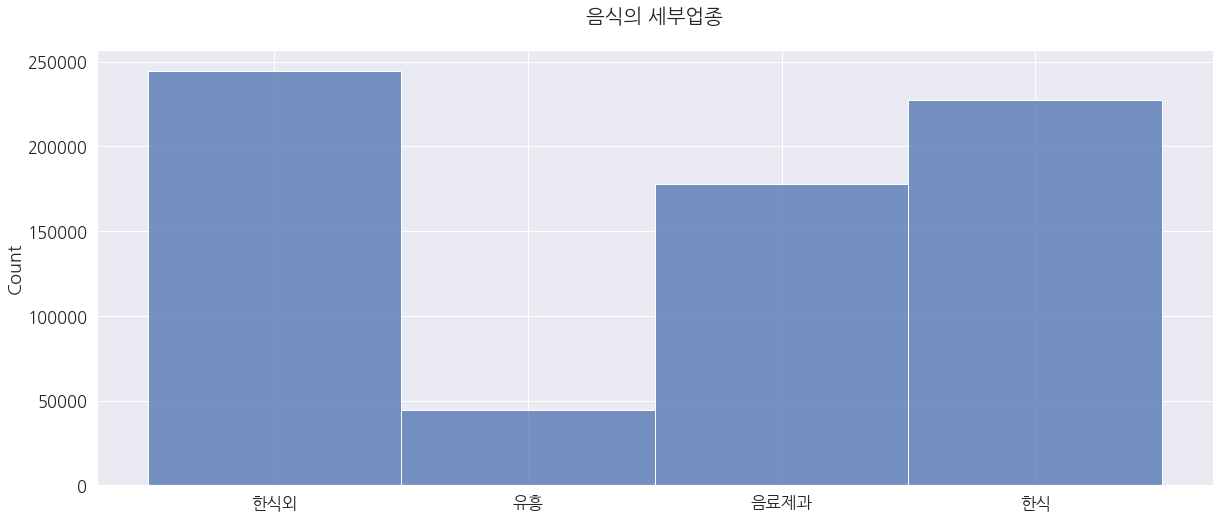

In [16]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
ax = sns.histplot(data=DATA[DATA['gb3']=='음식'], x="gb2")
ax.set_title('음식의 세부업종\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

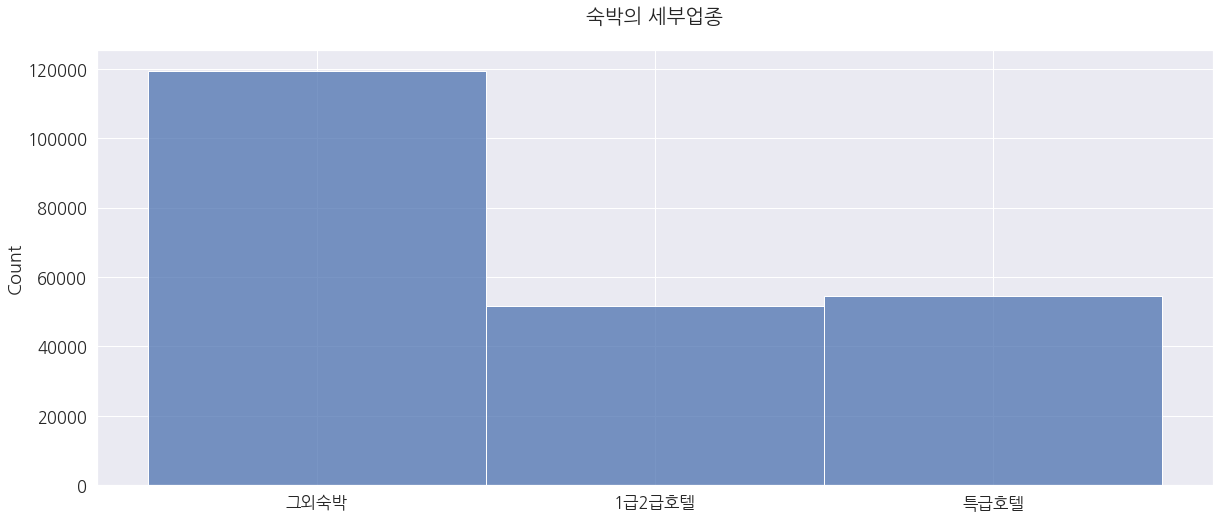

In [17]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
ax = sns.histplot(data=DATA[DATA['gb3']=='숙박'], x="gb2")
ax.set_title('숙박의 세부업종\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

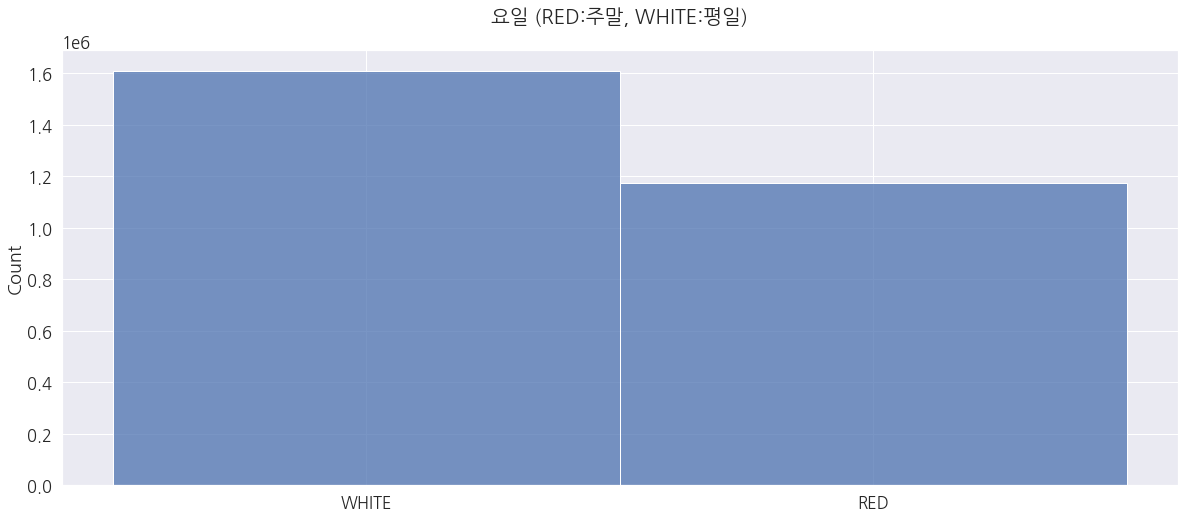

In [18]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
ax = sns.histplot(data=DATA, x="daw_ccd_r")
ax.set_title('요일 (RED:주말, WHITE:평일)\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

# 연속형 변수

In [19]:
DATA[['vlm', 'usec']].describe()

,vlm,usec
count,"2,781,394","2,781,394"
mean,"7,731,426",72
std,"153,804,638",760
min,0,1
25%,"41,000",1
50%,"173,820",4
75%,"904,000",15
max,"35,924,440,411","144,180"


In [20]:
# 국적에 따른 취급액과 이용건수

DATA.groupby('nt')[['vlm', 'usec']].describe().transpose()

nt                    대만            독일           러시아       말레이지아  \
vlm  count       112,046       126,407       147,565      86,054   
     mean      8,900,222     1,661,397     2,721,274   2,554,302   
     std      66,241,322    14,962,422    20,202,639  16,261,397   
     min               0             0             0          10   
     25%          36,000        31,450        27,000      30,000   
     50%         160,000       118,400       107,000     110,500   
     75%         894,000       518,660       537,890     513,398   
     max   2,487,389,575 1,253,786,158 1,166,464,629 685,528,921   
usec count       112,046       126,407       147,565      86,054   
     mean             73            24            38          24   
     std             474           101           173         134   
     min               1             1             1           1   
     25%               1             1             1           1   
     50%               4             3             4           3   
     75%              16            10            15           8   
     max          20,878         5,125         9,932       4,974   

nt                    몽고            미국           베트남           싱가폴  \
vlm  count        59,757       385,221       112,943       132,664   
     mean      1,454,188    12,087,750     2,268,655     5,873,650   
     std      23,450,475    96,038,948    21,843,417    39,792,031   
     min               0            10            10             0   
     25%          16,500        89,000        35,500        44,500   
     50%          55,000       459,450       125,000       178,800   
     75%         227,830     2,572,477       480,000       927,762   
     max   2,635,235,022 6,679,428,392 1,485,992,710 3,147,648,426   
usec count        59,757       385,221       112,943       132,664   
     mean             10           182            17            35   
     std              31         1,391           112           167   
     min               1             1             1             1   
     25%               1             2             1             1   
     50%               2             8             2             3   
     75%               7            42             7            11   
     max           1,036       100,925         7,265         5,459   

nt             아랍에미레이트            영국     오스트레일리아       인도네시아             일본  \
vlm  count      76,531       156,713     151,907      87,102        236,336   
     mean    1,716,461     5,224,219   1,638,244   1,910,217     13,024,876   
     std    10,036,145    56,972,516  11,613,483  13,686,471    246,121,039   
     min             0             0           0          10              0   
     25%        35,000        32,000      31,500      33,075         55,700   
     50%       122,110       120,800     112,600     115,775        247,900   
     75%       505,000       566,460     457,500     456,454      1,306,062   
     max   363,094,430 3,894,571,769 986,460,560 743,753,920 25,844,489,854   
usec count      76,531       156,713     151,907      87,102        236,336   
     mean           13            40          22          17            127   
     std            50           252         118          94          1,214   
     min             1             1           1           1              1   
     25%             1             1           1           1              2   
     50%             2             3           3           2              4   
     75%             6            13           9           7             21   
     max         1,742        16,133       5,173       3,886        108,868   

nt                     중국       카자흐스탄         캐나다            태국         프랑스  \
vlm  count        218,047      78,725     157,168       117,800     126,186   
     mean      34,288,091   1,508,100   1,415,333     4,084,298   1,152,518   
     std      455,714,351  11,941,311   9,501,723    33,444,127   6,466

In [21]:
# 가맹점 업종 대분류에 따른 취급액과 이용건수

DATA.groupby('gb3')[['vlm', 'usec']].describe().transpose()

gb3                   교통             쇼핑            숙박           스포츠  \
vlm  count       143,803        991,945       225,394       160,371   
     mean      6,929,690     12,229,240    20,895,394       795,741   
     std      79,151,178    238,393,437   158,474,906     8,194,526   
     min              20              0            10             1   
     25%          50,000         53,200       195,100        30,000   
     50%         156,966        242,000       971,998       100,000   
     75%         634,336      1,293,600     5,569,707       380,000   
     max   4,700,903,238 35,924,440,411 9,316,290,193 1,527,087,986   
usec count       143,803        991,945       225,394       160,371   
     mean             54            113            60             8   
     std             505          1,041           372            54   
     min               1              1             1             1   
     25%               1              2             2             1   
     50%               3              5             4             2   
     75%               9             23            21             4   
     max          28,157        144,180        23,978         4,997   

gb3                   음식            의료          체험  
vlm  count       694,476       322,631     242,774  
     mean      2,828,737     4,389,457     654,610  
     std      28,458,145    82,242,847   5,115,042  
     min               1             1           0  
     25%          34,000        31,050      20,000  
     50%         127,700       149,560      65,099  
     75%         577,982       787,216     242,500  
     max   2,741,226,617 9,836,835,003 364,332,213  
usec count       694,476       322,631     242,774  
     mean             84            12          10  
     std             810            68          58  
     min               1             1           1  
     25%               2             1           1  
     50%               5             2           2  
     75%              20             6           5  
     max         100,925         5,636       3,839

In [22]:
# 쇼핑의 소분류에 따른 취급액과 이용건수

DATA[DATA['gb3']=='쇼핑'].groupby('gb2')[['vlm', 'usec']].describe().transpose()

gb2             가전전자제품          관광상품       관광여행사        기타쇼핑           기타지출  \
vlm  count      46,918        42,177      12,597     151,684         80,484   
     mean    1,788,495    11,952,227   4,820,483   1,720,500     36,102,169   
     std     8,009,941    78,666,320  26,113,074  12,910,376    461,039,382   
     min            10           500         100          45              0   
     25%        44,000        38,000      90,000      30,000         35,000   
     50%       198,000       169,500     487,997     109,000        222,950   
     75%     1,021,450       972,100   2,114,750     450,271      2,202,792   
     max   577,495,852 2,801,471,940 854,650,042 818,913,100 33,399,521,885   
usec count      46,918        42,177      12,597     151,684         80,484   
     mean            6            32          16          29            294   
     std            17           134          60         160          2,315   
     min             1             1           1           1              1   
     25%             1             1           1           1              1   
     50%             2             2           3           3              4   
     75%             4             9          11          11             22   
     max           703         3,919       1,059       7,174        144,180   

gb2                   면세점            백화점         쇼핑몰           의류잡화  \
vlm  count         17,266         85,853      18,329        155,985   
     mean     135,516,266     28,305,363   2,820,531     10,263,990   
     std      881,173,108    497,478,597  13,768,668    140,146,426   
     min              801            330           0            100   
     25%          603,140        213,000      67,000         76,000   
     50%        3,198,336        943,560     274,900        305,000   
     75%       22,624,306      4,732,140   1,089,400      1,426,900   
     max   28,753,291,745 35,924,440,411 503,162,020 10,618,479,676   
usec count         17,266         85,853      18,329        155,985   
     mean             535            131          50             83   
     std            2,474          1,273         313            795   
     min                1              1           1              1   
     25%                4              4           2              2   
     50%               19             11           5              4   
     75%              127             42          20             15   
     max           45,750         87,291      10,774         56,700   

gb2              할인점/편의점           화장품  
vlm  count       278,489       102,163  
     mean      4,172,262     7,153,169  
     std      29,344,789    78,698,667  
     min              20            10  
     25%          56,920        40,000  
     50%         261,600       140,000  
     75%       1,224,650       672,390  
     max   1,762,164,753 6,611,973,002  
usec count       278,489       102,163  
     mean            149            61  
     std             959           539  
     min               1             1  
     25%               3             1  
     50%              12             3  
     75%              51            12  
     max          98,810        37,740

In [23]:
# 요일에 따른 취급액과 이용건수

DATA.groupby('daw_ccd_r')[['vlm', 'usec']].describe().transpose()

daw_ccd_r             RED          WHITE
vlm  count      1,172,837      1,608,557
     mean       5,422,025      9,415,264
     std       95,070,431    185,221,774
     min                0              0
     25%           35,100         47,450
     50%          140,300        202,000
     75%          712,850      1,066,137
     max   21,237,675,539 35,924,440,411
usec count      1,172,837      1,608,557
     mean              53             85
     std              500            903
     min                1              1
     25%                1              1
     50%                3              4
     75%               12             16
     max           58,100        144,180

In [24]:
# 카드이용 가맹점 주소(시도)에 따른 취급액과 이용건수

DATA.groupby('v2')[['vlm', 'usec']].describe().transpose()

v2                     서울            부산          대구             인천  \
vlm  count        727,769       276,226     110,565        160,230   
     mean      20,598,442     3,626,856   2,016,630      9,889,794   
     std      288,486,999    23,871,469  13,497,599    149,810,540   
     min                0           100         100             50   
     25%           77,300        40,400      34,700         47,902   
     50%          426,340       170,000     131,100        209,000   
     75%        2,730,490       863,926     603,170      1,105,022   
     max   35,924,440,411 1,202,796,182 818,913,100 11,315,569,598   
usec count        727,769       276,226     110,565        160,230   
     mean             166            40          37             87   
     std            1,220           189         252            725   
     min                1             1           1              1   
     25%                2             1           1              1   
     50%                7             4           3              4   
     75%               39            15          11             17   
     max          144,180         7,523      11,506         38,112   

v2                  광주          대전          울산         세종            경기  \
vlm  count      61,217      76,910      54,179     10,709       515,174   
     mean      883,335     933,797     906,978    602,875     3,374,903   
     std     4,304,461   3,686,756   4,262,373  1,836,338    28,291,612   
     min            25          10         200        320            20   
     25%        28,000      30,200      29,550     27,500        44,000   
     50%        98,000     110,400     102,660     86,800       177,810   
     75%       381,850     450,000     406,551    327,070       831,107   
     max   331,726,594 106,274,664 215,869,911 29,738,150 2,741,226,617   
usec count      61,217      76,910      54,179     10,709       515,174   
     mean           16          19          11         18            55   
     std            61          62          32         62           867   
     min             1           1           1          1             1   
     25%             1           1           1          1             1   
     50%             3           3           2          3             4   
     75%             8          11           7          8            12   
     max         2,786       1,962         728      1,365       100,925   

v2                    강원          충북          충남          전북          전남  \
vlm  count       130,213      68,941     103,148      76,587      91,850   
     mean      1,647,361     858,249     936,646   1,040,811     491,608   
     std      13,915,517   5,035,878   5,221,696   5,047,889   2,877,163   
     min              10          10          10         180          10   
     25%          30,000      25,800      27,000      26,500      24,300   
     50%         102,000      90,000      89,000      90,950      77,000   
     75%         391,000     349,200     343,926     351,050     260,319   
     max   1,527,087,986 303,014,038 335,193,028 155,559,220 246,756,000   
usec count       130,213      68,941     103,148      76,587      91,850   
     mean             16          14          18          23           8   
     std              93          58         110         169          24   
     min               1           1           1           1           1   
     25%               1           1           1           1           1   
     50%               2           2           2           2           2   
     75%               7           7           7           7           5   
     max          13,711       2,516       5,012       7,113       1,517   

v2                  경북          경남            제주  
vlm  count     122,627     133,627        60,564  
     mean      971,685   1,126,607    16,820,300  
     std     5,731,070   4,719,735   115,860,092  
     min           100          10  

In [25]:
# 서울의 카드이용 가맹점 주소(시군구)에 따른 취급액과 이용건수

DATA[DATA['v2']=='서울'].groupby('v3')[['vlm', 'usec']].describe().transpose()

v3                    강남구           강동구        강북구           강서구         관악구  \
vlm  count         53,125        20,739     16,329        31,612      25,290   
     mean      59,551,272     1,725,596    674,504    17,324,384   2,264,280   
     std      427,680,746    13,366,293  2,053,829   120,986,206  13,252,344   
     min                0           100        500             1         100   
     25%          334,000        38,000     31,600       104,792      49,175   
     50%        2,513,732       160,000    105,800       510,575     200,000   
     75%       16,695,470       677,000    395,400     2,629,876     838,305   
     max   28,753,291,745 1,006,010,168 61,737,802 3,894,571,769 514,344,052   
usec count         53,125        20,739     16,329        31,612      25,290   
     mean             417            19         14           119          50   
     std            1,997            63         38           581         226   
     min                1             1          1             1           1   
     25%                4             1          1             2           2   
     50%               20             4          3             7           5   
     75%              133            11          9            34          21   
     max          144,180         2,601        734        15,229      11,385   

v3                 광진구            구로구         금천구         노원구        도봉구  ...  \
vlm  count      29,312         24,436      20,565      19,289     11,516  ...   
     mean    3,384,145     69,651,136   2,777,219     984,260    447,931  ...   
     std    13,630,734    801,745,517  13,228,997   3,896,174  1,532,659  ...   
     min           200              0          43         400        900  ...   
     25%        56,448         68,988      50,000      36,000     24,600  ...   
     50%       264,145        352,450     239,400     128,880     78,000  ...   
     75%     1,309,025      2,326,950   1,086,000     500,940    270,338  ...   
     max   368,369,260 33,399,521,885 577,495,852 197,073,480 53,690,080  ...   
usec count      29,312         24,436      20,565      19,289     11,516  ...   
     mean           55            331          23          21         10  ...   
     std           229          2,893          85          65         29  ...   
     min             1              1           1           1          1  ...   
     25%             2              2           2           1          1  ...   
     50%             6              6           4           4          2  ...   
     75%            25             30          13          12          7  ...   
     max         5,847        108,868       4,057       1,214        705  ...   

v3                 성동구         성북구           송파구         양천구          영등포구  \
vlm  count      25,918      24,742        40,940      19,742        37,921   
     mean    3,244,912   1,798,132    14,217,533   1,638,036    12,672,798   
     std    16,430,357   6,924,453   101,334,379  12,857,310   107,232,240   
     min           100         100           300          10             1   
     25%        61,500      46,702        85,980      40,000        97,020   
     50%       280,410     193,050       494,850     146,300       552,250   
     75%     1,333,068     859,135     3,271,108     571,995     3,272,670   
     max   676,312,034 145,530,918 5,540,374,189 589,904,233 7,708,373,790   
usec count      25,918      24,742        40,940      19,742        37,921   
     mean           64          62           124          21           105   
     std           264         325           711          98           435   
     min             1           1             1           1             1   
     25%             2           2             2           1             3   
     50%             5           5             7           4            10   
     75%            26          22            38          11            49   
     max     

In [26]:
# 제주의 카드이용 가맹점 주소(시군구)에 따른 취급액과 이용건수

DATA[DATA['v2']=='제주'].groupby('v3')[['vlm', 'usec']].describe().transpose()

v3                  서귀포시           제주시
vlm  count        26,107        34,457
     mean     14,507,464    18,572,664
     std     134,243,176    99,666,179
     min             100            10
     25%          85,000        98,000
     50%         387,500       537,750
     75%       2,073,246     3,433,600
     max   8,101,795,332 3,309,750,540
usec count        26,107        34,457
     mean             66           132
     std             274           639
     min               1             1
     25%               2             2
     50%               6             8
     75%              26            43
     max           6,733        17,271

In [27]:
# 미국인의 카드이용 가맹점 주소(시도)에 따른 취급액과 이용건수

DATA[DATA['nt']=='미국'].groupby('v2')[['vlm', 'usec']].describe().transpose()

v2                    서울            부산          대구            인천          광주  \
vlm  count        68,821        31,487      18,461        19,716       9,363   
     mean     39,323,333     6,762,138   5,212,887    17,356,750   2,064,266   
     std     200,202,530    33,031,361  15,254,951   134,017,488   8,514,045   
     min              10           500       1,000            96         200   
     25%         246,630       110,000     149,370       102,000      73,875   
     50%       1,690,200       588,600     765,500       630,800     330,000   
     75%      10,508,220     2,685,865   3,613,130     3,046,225   1,202,548   
     max   6,679,428,392 1,079,449,648 383,468,731 3,406,376,464 331,726,594   
usec count        68,821        31,487      18,461        19,716       9,363   
     mean            482            86         146           216          36   
     std           2,143           298         593         1,206         102   
     min               1             1           1             1           1   
     25%               4             2           3             2           2   
     50%              23            10          12             9           5   
     75%             144            53          54            48          23   
     max          92,038         7,523      11,506        21,730       2,786   

v2                 대전          울산         세종            경기          강원  \
vlm  count     10,178       7,749      1,905        70,096      23,285   
     mean   2,220,708   1,764,758  1,662,611    11,242,715   3,204,253   
     std    6,053,908   6,628,219  3,208,831    62,783,051  15,272,648   
     min          100         700      1,000           500         200   
     25%       81,000      61,900     68,000       128,000      55,000   
     50%      416,592     266,130    430,000       766,400     241,430   
     75%    1,625,185     984,400  1,578,400     4,009,325   1,026,750   
     max   97,396,193 215,869,911 29,738,150 2,741,226,617 407,095,637   
usec count     10,178       7,749      1,905        70,096      23,285   
     mean          40          21         37           273          38   
     std           86          46         78         2,306         171   
     min            1           1          1             1           1   
     25%            2           2          2             3           2   
     50%            7           5          6            11           5   
     75%           31          19         31            65          21   
     max          962         541        768       100,925      13,711   

v2                  충북          충남          전북          전남          경북  \
vlm  count      12,510      20,708      15,948      19,971      25,370   
     mean    1,191,265   1,914,438   2,576,440     750,442   2,251,742   
     std     4,388,881   6,909,745   9,245,462   3,243,110   8,964,156   
     min           500          45         900         300         800   
     25%        48,000      57,052      55,000      41,000      58,000   
     50%       186,061     250,000     218,515     134,200     216,000   
     75%       700,000   1,052,600     954,650     445,130     918,950   
     max   116,655,339 175,464,870 155,559,220 109,786,608 245,493,562   
usec count      12,510      20,708      15,948      19,971      25,370   
     mean           25          46          66          12          59   
     std            82         210         350          37         264   
     min             1           1           1           1           1   
     25%             1           2           2           1           2   
     50%             4           5           5           3           5   
     75%            14          19          18           9          19   
     max         1,327       5,012       7,113       1,517       6,908   

v2                  경남            제주  
vlm  count      23,434         6,019  
     mean    2,369,970    25,592,024  
    

In [28]:
# 미국인의 가맹점 업종 대분류에 따른 취급액과 이용건수

DATA[DATA['nt']=='미국'].groupby('gb3')[['vlm', 'usec']].describe().transpose()

gb3                   교통            쇼핑            숙박         스포츠  \
vlm  count        19,359       110,666        27,113      46,307   
     mean     17,987,872    15,867,296    50,534,156     956,130   
     std     162,904,864   101,107,840   226,735,348   3,774,268   
     min           1,000            45         1,000          10   
     25%         284,682       160,000       279,300      36,000   
     50%         860,746       829,030     2,207,000     122,500   
     75%       2,594,971     4,813,902    17,470,275     497,500   
     max   4,700,903,238 6,679,428,392 5,976,872,859 228,481,793   
usec count        19,359       110,666        27,113      46,307   
     mean            133           288           164          12   
     std             869         1,763           533          77   
     min               1             1             1           1   
     25%               5             3             3           1   
     50%              15            13            16           2   
     75%              44            74            98           7   
     max          22,595        98,810        11,712       4,997   

gb3                   음식            의료          체험  
vlm  count        68,515        62,368      50,893  
     mean     10,744,535     5,485,691   1,170,223  
     std      61,886,042    55,494,326   6,481,261  
     min             500           300         400  
     25%         163,000        70,000      35,000  
     50%         803,500       408,000     122,000  
     75%       3,722,015     2,008,802     481,000  
     max   2,741,226,617 3,328,483,940 199,657,340  
usec count        68,515        62,368      50,893  
     mean            404            27          23  
     std           2,318           101         113  
     min               1             1           1  
     25%               6             2           1  
     50%              30             5           4  
     75%             142            18          12  
     max         100,925         5,636       3,839

In [29]:
# 중국인의 카드이용 가맹점 주소(시도)에 따른 취급액과 이용건수

DATA[DATA['nt']=='중국'].groupby('v2')[['vlm', 'usec']].describe().transpose()

v2                     서울            부산          대구             인천         광주  \
vlm  count         51,508        20,252       8,737         12,665      5,563   
     mean     109,688,684    11,907,913   5,162,361     35,968,701  3,117,384   
     std      906,139,496    53,904,379  20,455,330    380,234,678  7,114,832   
     min                0           361         800          1,500        921   
     25%          502,850       209,131     173,553        260,085    162,749   
     50%        2,949,356       898,326     607,378      1,184,860    628,400   
     75%       18,089,014     3,773,837   2,558,940      5,882,383  2,498,065   
     max   35,924,440,411 1,202,796,182 513,076,572 11,315,569,598 87,629,569   
usec count         51,508        20,252       8,737         12,665      5,563   
     mean             522            94          43            234         52   
     std            2,550           320         118          1,545        134   
     min                1             1           1              1          1   
     25%                6             4           2              4          2   
     50%               26            12           8             12          9   
     75%              157            47          28             51         37   
     max           87,291         6,431       1,665         38,112      2,262   

v2                  대전          울산         세종            경기            강원  \
vlm  count       6,221       3,970      1,057        41,676        10,032   
     mean    3,410,222   2,866,035  1,861,878     9,889,018     2,659,073   
     std     7,846,460   9,288,635  3,063,943    38,586,198    15,926,871   
     min         1,000       1,322      3,000            36           723   
     25%       172,152     133,896    165,844       274,797       120,008   
     50%       699,355     449,956    588,544     1,189,663       420,706   
     75%     2,789,165   1,690,690  2,133,465     5,120,748     1,603,001   
     max   106,274,664 170,502,155 20,388,457 1,397,198,835 1,083,845,884   
usec count       6,221       3,970      1,057        41,676        10,032   
     mean           55          23         65            77            28   
     std           137          56        150           274           102   
     min             1           1          1             1             1   
     25%             3           2          2             4             2   
     50%            11           6          8            11             5   
     75%            40          17         43            43            15   
     max         1,962         647      1,365        10,838         3,833   

v2                  충북          충남          전북         전남          경북  \
vlm  count       6,797       9,686       7,148      7,847      10,422   
     mean    2,874,996   2,590,537   2,685,761  1,296,377   2,053,080   
     std     9,283,536  10,348,229   6,815,178  3,999,375   6,505,691   
     min           723         460         180        361       1,800   
     25%       115,733     125,812     109,391     92,272     121,157   
     50%       454,050     444,186     424,147    289,085     386,976   
     75%     1,906,261   1,520,203   1,833,300    990,064   1,354,278   
     max   303,014,038 335,193,028 138,796,881 84,384,317 145,898,620   
usec count       6,797       9,686       7,148      7,847      10,422   
     mean           40          34          48         15          25   
     std           128         125         159         33          79   
     min             1           1           1          1           1   
     25%             2           2           2          2           2   
     50%             6           6           6          4           5   
     75%            22          20          26         13          16   
     max         2,516       2,805       2,563        496       2,273   

v2                  경남            제주  
vlm  count       9,267         

In [30]:
# 중국인의 가맹점 업종 대분류에 따른 취급액과 이용건수

DATA[DATA['nt']=='중국'].groupby('gb3')[['vlm', 'usec']].describe().transpose()

gb3                   교통             쇼핑            숙박         스포츠  \
vlm  count        11,853         74,629        17,872      13,786   
     mean     12,554,676     68,382,817    57,495,941   2,256,344   
     std      85,488,273    738,281,911   358,279,838  10,883,317   
     min             540              0           361       1,334   
     25%         232,274        290,690       737,088     101,266   
     50%         672,698      1,437,280     3,629,664     357,426   
     75%       2,010,861      8,116,428    17,092,451   1,469,620   
     max   2,145,608,990 35,924,440,411 9,316,290,193 843,749,242   
usec count        11,853         74,629        17,872      13,786   
     mean             81            336           116          14   
     std             444          2,081           769          77   
     min               1              1             1           1   
     25%               3              4             4           2   
     50%               8             17            11           2   
     75%              22             93            42           6   
     max           9,133         87,291        23,594       3,171   

gb3                   음식            의료          체험  
vlm  count        48,460        28,916      22,531  
     mean     12,709,156    17,349,459   2,131,621  
     std      72,293,816   249,284,123  12,329,100  
     min             368            36          43  
     25%         220,094       157,550      80,463  
     50%       1,004,256       765,354     282,099  
     75%       4,405,128     3,423,144   1,043,414  
     max   2,493,895,580 9,836,835,003 364,332,213  
usec count        48,460        28,916      22,531  
     mean            227            28          19  
     std           1,027           134          57  
     min               1             1           1  
     25%               5             2           2  
     50%              22             6           5  
     75%              92            17          13  
     max          28,660         4,545       1,947

# 시계열 시각화

In [31]:
# 년월에 따른 취급액과 이용건수의 통계량

DATA.groupby('ta_ym').describe()

vlm                                                      \
            count       mean         std min    25%     50%       75%   
ta_ym                                                                   
2018-01-01 59,269  9,165,869 204,456,635 100 46,710 199,000 1,049,300   
2018-02-01 60,452  8,954,456 185,502,828  10 48,500 207,425 1,087,040   
2018-03-01 65,332 10,102,389 178,930,862 100 49,400 216,000 1,173,105   
2018-04-01 68,656 10,382,331 213,499,909  10 49,500 213,590 1,168,618   
2018-05-01 68,509 10,278,059 203,248,597  28 48,000 211,000 1,149,500   
2018-06-01 68,548  9,482,107 151,414,220 100 48,100 206,000 1,137,182   
2018-07-01 68,527  9,114,735 141,345,154  23 48,200 208,000 1,110,000   
2018-08-01 67,110  9,701,045 165,238,109  11 47,900 203,000 1,070,975   
2018-09-01 69,023  9,981,072 180,789,755  43 46,900 201,300 1,119,188   
2018-10-01 71,129 10,958,277 190,247,381   0 51,000 230,157 1,248,537   
2018-11-01 67,753 10,845,313 175,484,161   1 49,500 220,000 1,213,880   
2018-12-01 68,212 11,274,207 221,288,458   1 48,900 219,000 1,200,000   
2019-01-01 62,672  9,103,926 153,392,306  25 45,000 193,000 1,046,632   
2019-02-01 61,777  8,558,762 135,503,680 100 45,440 192,300 1,013,956   
2019-03-01 67,992  9,864,973 155,862,153 100 46,800 205,260 1,164,932   
2019-04-01 72,999 10,566,064 170,586,947 300 49,576 215,100 1,204,900   
2019-05-01 73,052 10,913,070 205,503,066 100 47,700 205,390 1,157,188   
2019-06-01 73,470 10,065,118 162,089,979  10 46,000 203,941 1,138,790   
2019-07-01 72,794  9,919,586 166,016,413  96 46,700 200,234 1,098,650   
2019-08-01 73,415 10,058,860 175,048,689  10 45,532 200,000 1,073,938   
2019-09-01 72,693  9,659,065 160,372,657  10 46,000 200,000 1,100,000   
2019-10-01 76,501 11,275,958 209,831,234 100 49,900 220,500 1,235,300   
2019-11-01 73,235 10,878,919 191,736,790  24 47,000 210,000 1,206,085   
2019-12-01 72,602 11,040,038 198,435,942 150 47,900 212,134 1,179,832   
2020-01-01 67,964 10,243,673 194,512,492 100 46,000 197,685 1,067,498   
2020-02-01 61,602  6,452,891  87,859,087 100 42,500 178,800   943,750   
2020-03-01 44,210  2,896,322  75,314,363   0 30,000 110,600   509,600   
2020-04-01 44,416  2,501,133  66,574,361 100 29,600 108,000   472,888   
2020-05-01 50,010  3,040,610  91,049,555  10 30,000 112,133   501,808   
2020-06-01 50,277  3,295,568 109,741,675   0 31,000 120,000   523,610   
2020-07-01 52,401  3,756,302 123,319,774 100 31,940 120,000   548,900   
2020-08-01 51,842  3,963,785 130,620,694  36 32,000 122,200   557,150   
2020-09-01 48,639  3,238,856  84,510,950   0 32,945 125,600   573,350   
2020-10-01 51,382  3,610,394  93,960,453  50 33,000 128,688   595,228   
2020-11-01 49,646  3,624,038  86,263,865 100 33,000 130,400   609,860   
2020-12-01 45,313  3,756,769 102,290,998   0 34,000 128,610   612,900   
2021-01-01 43,800  3,333,808  92,063,682 100 31,858 117,900   549,485   
2021-02-01 44,541  2,902,845  68,639,946  20 30,000 109,550   477,000   
2021-03-01 47,968  3,290,278  93,555,697 100 31,500 121,525   549,925   
2021-04-01 48,133  3,751,849 106,472,496 100 33,000 131,000   613,000   
2021-05-01 50,730  3,806,594  81,199,855   0 34,000 133,040   635,028   
2022-01-01 49,301  3,724,859  78,201,804 100 35,140 138,000   632,770   
2022-02-01 48,114  3,706,257  76,368,185 100 35,000 135,000   620,000   
2022-03-01 52,263  4,186,122 102,089,243 100 38,000 146,000   707,630   
2022-04-01 59,271  4,727,069  84,580,645 100 42,700 173,000   848,946   
2022-05-01 63,849  5,157,100  80,370,823 100 43,400 184,110   899,000   

                            usec                                   
                      max  count mean std min 25% 50% 75%     max  
ta_ym                                                              
2018-01-01 35,924,440,411 59,269   71 802   1   1   4  15  92,038  
2018-02-01 32,004,520,924 60,452   72 720   1   1   4  15  66,329  
2018-03-01 22,944,356,449 65,332   81 768   1   1   4  16  64,716  
2018-04-01 33,399,521,885 68

**2021년 6월 ~ 12월에는 데이터가 없다.**

**2022년 5월 데이터가 포함되어 있음; 데이터 설명에는 (대상기간: ’18년 1월 ~ ’22년 4월)이라고 나와있음**

**평균이랑 중위수랑 차이가 매우 크다(최대값이 너무 큼). 중위수를 쓰는게 더 좋아보이기도 하다.**

In [32]:
DATA.groupby('ta_ym').median()

,vlm,usec
ta_ym,,
2018-01-01,"199,000",4
2018-02-01,"207,425",4
2018-03-01,"216,000",4
2018-04-01,"213,590",4
2018-05-01,"211,000",4
2018-06-01,"206,000",4
2018-07-01,"208,000",4
2018-08-01,"203,000",4
2018-09-01,"201,300",4


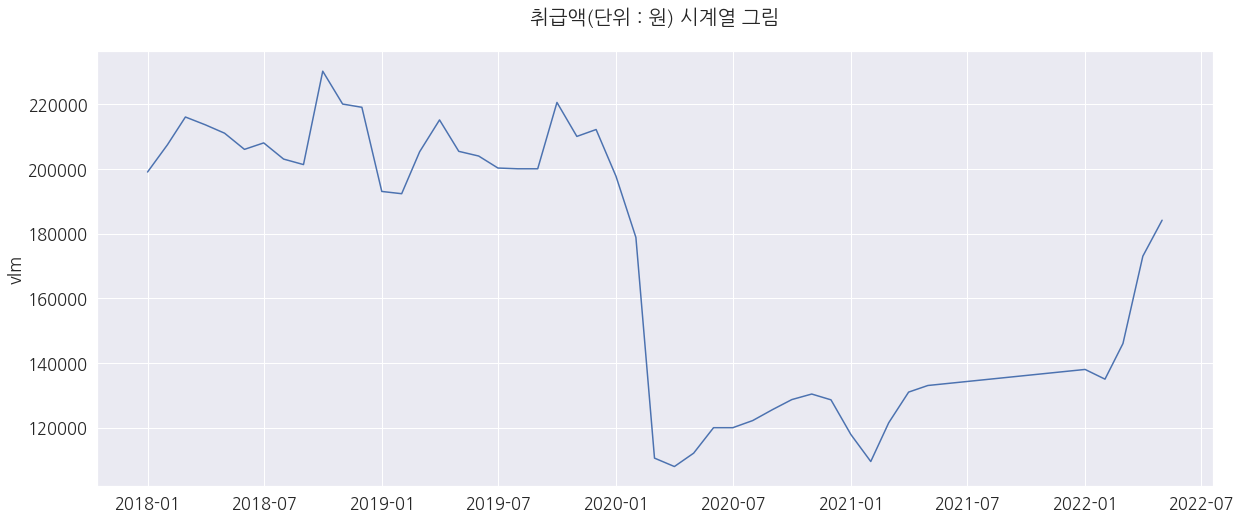

In [33]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
ax = sns.lineplot(data=DATA.groupby('ta_ym').median(), x="ta_ym", y="vlm", ci=None)
ax.set_title('취급액(단위 : 원) 시계열 그림\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

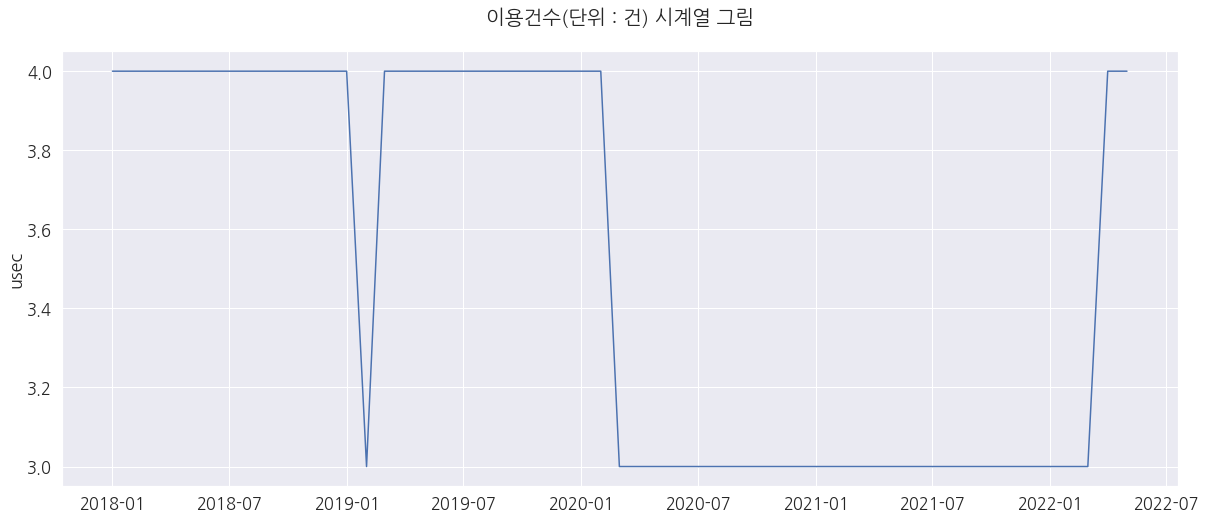

In [34]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
ax = sns.lineplot(data=DATA.groupby('ta_ym').median(), x="ta_ym", y="usec", ci=None)
ax.set_title('이용건수(단위 : 건) 시계열 그림\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

**이용건수는 별로 도움이 안되어 보임**

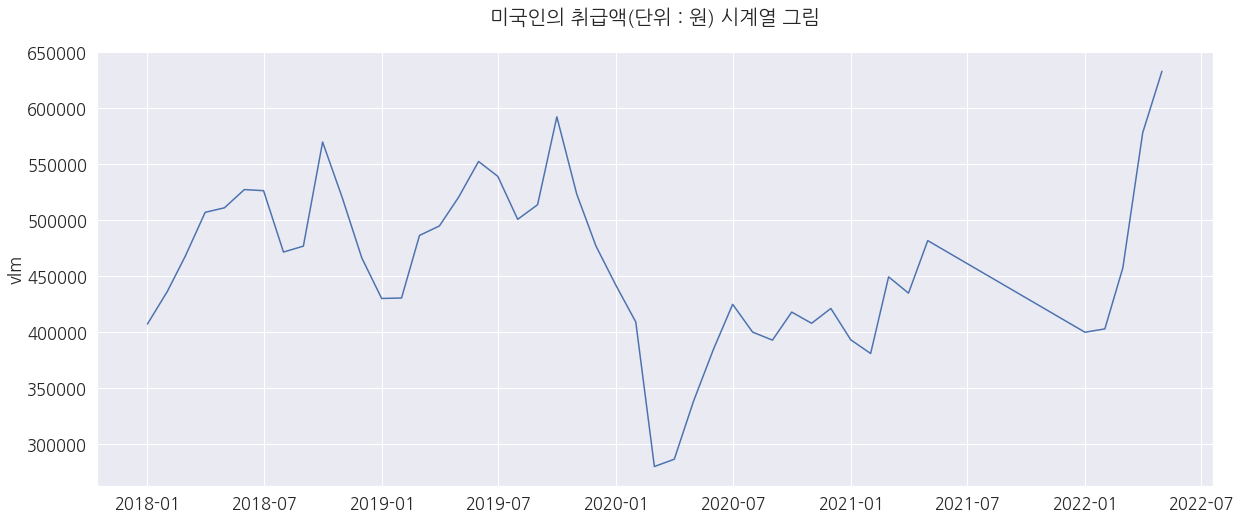

In [35]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
ax = sns.lineplot(data=DATA[DATA['nt']=='미국'].groupby('ta_ym').median(), x="ta_ym", y="vlm", ci=None)
ax.set_title('미국인의 취급액(단위 : 원) 시계열 그림\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output

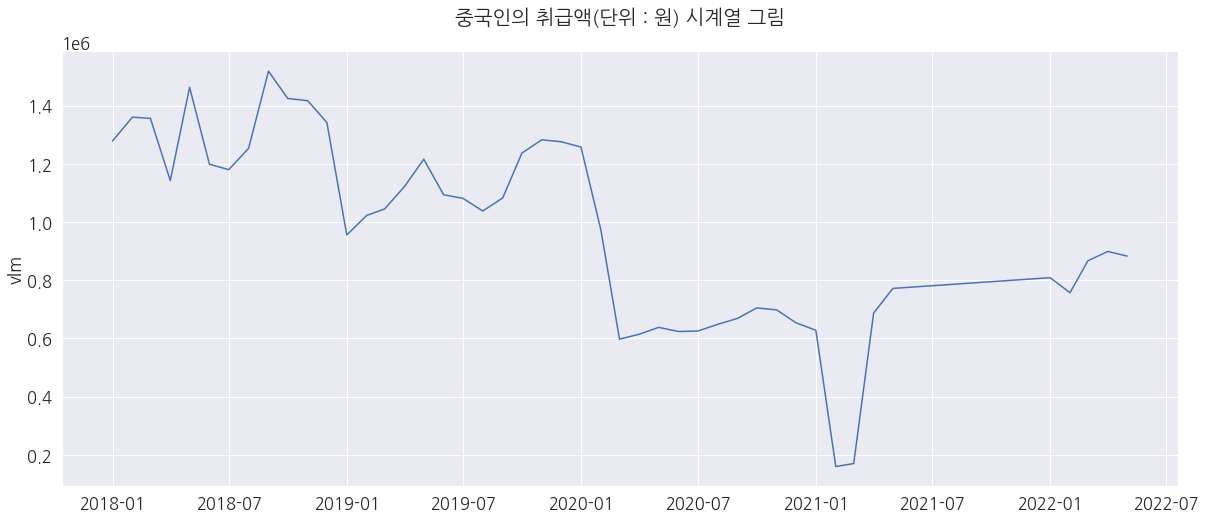

In [36]:
sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize=(20, 8))
ax = sns.lineplot(data=DATA[DATA['nt']=='중국'].groupby('ta_ym').median(), x="ta_ym", y="vlm", ci=None)
ax.set_title('중국인의 취급액(단위 : 원) 시계열 그림\n', fontsize=20)
ax.set_xlabel('');  # semicolon suppresses text output